##Business Analytics and Data Visualization
###Prof. Jose Mendoza

Chapter 6 - Exercise 27

File: breakfast.csv

*Note: This notebook assumes that the file breakfast.csv is located in Google Drive, in a folder named 'Data'. *

In [10]:
# Import libraries
import pandas as pd
import numpy as np


In [11]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Read file breakfast.csv from Google Drive (Data folder)
df = pd.read_csv('/content/drive/My Drive/Data/breakfast.csv')
print(df.head())


                                     Name  Calories  Protein  Fat  Sodium  \
0  100%_Bran                                     70        4    1     130   
1  100%_Natural_Bran                            120        3    5      15   
2  All-Bran                                      70        4    1     260   
3  All-Bran_with_Extra_Fiber                     50        4    0     140   
4  Almond_Delight                               110        2    2     200   

   Fiber  Carbo  Sugars  Potass  Vitamins  Weight  Cups  
0   10.0    5.0       6     280        25     1.0  0.33  
1    2.0    8.0       8     135         0     1.0  1.00  
2    9.0    7.0       5     320        25     1.0  0.33  
3   14.0    8.0       0     330        25     1.0  0.50  
4    1.0   14.0       8       0        25     1.0  0.75  


In [13]:
# Create a new dataframe with only the numeric columns
df_numeric = df.select_dtypes(include='number')
print(df_numeric.head())

   Calories  Protein  Fat  Sodium  Fiber  Carbo  Sugars  Potass  Vitamins  \
0        70        4    1     130   10.0    5.0       6     280        25   
1       120        3    5      15    2.0    8.0       8     135         0   
2        70        4    1     260    9.0    7.0       5     320        25   
3        50        4    0     140   14.0    8.0       0     330        25   
4       110        2    2     200    1.0   14.0       8       0        25   

   Weight  Cups  
0     1.0  0.33  
1     1.0  1.00  
2     1.0  0.33  
3     1.0  0.50  
4     1.0  0.75  


In [21]:
# Principal components analysis

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
x = StandardScaler().fit_transform(df_numeric)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Create a new dataframe with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(principalDf.head())


   principal component 1  principal component 2
0               5.125557               2.265345
1               1.559850              -0.321681
2               4.914056               1.742525
3               5.561241               3.688100
4              -0.829776              -0.482521


In [22]:
# What percentage of variation is explained by the Principal Components

# Explained variance
print(pca.explained_variance_ratio_)


[0.27956978 0.24088067]


Q. What percentage of variation is explained by the Principal Components?
A.
PC1 = 27.95%
PC2 = 24.08&

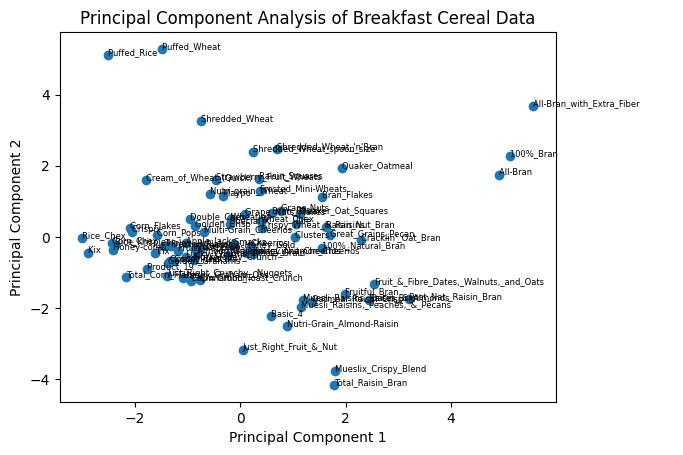

In [29]:
# Display the principal component in a scatter plot

import matplotlib.pyplot as plt

# Scatter plot of the principal components
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Breakfast Cereal Data')
# Add labels to the points
for i, txt in enumerate(df['Name']):
    plt.annotate(txt, (principalDf['principal component 1'][i], principalDf['principal component 2'][i]),fontsize=6)

plt.show()

From the previous plot, it seems like there are four clusters of cereals:
1. Puffed cereals (Puffed Rice and Puffed Wheat)
2. Bran cereals (All-Bran, 100% Bran, and All Bran with Extra Fiber)
3. Fruit-based cereals (Fruit & Nut, Raisin Bran, Almond Raisin, etc.)
4. Core cereals (Corn Flakes, Bran Flakes, Oatmeal, etc.)